Assignment: Create a Python project which will depict following charts

Chart 1: Total month wise Covid-19 cases in the United States year to date

Chart 2: Number of cases(state wise)

Chart 3: Number of cases recovered(state wise)

Chart 4: Top 5 countries based on number of cases

In [56]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Chart 1: Total month wise Covid-19 cases in the United States year to date

In [57]:
us_df = pd.read_csv('USCovidCases.csv')
us_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,4/15/20,RI,3529,NaN,NaN,160,NaN,87,NaN,NaN,7,NaN,4/15/20 16:22,Not agree,NaN
1,3/23/20,NH,101,NaN,NaN,23,NaN,1,NaN,NaN,1,NaN,3/26/20 16:22,Not agree,Not agree
2,8/21/20,MD,103523,NaN,NaN,624,0.0,3685,3546.0,139.0,11,1.0,8/22/20 14:21,NaN,Agree
3,2/27/21,MS,294795,182857.0,111938.0,704,478.0,6681,4672.0,2009.0,12,7.0,2/28/21 14:48,Agree,Agree
4,3/12/20,NJ,29,NaN,NaN,6,NaN,1,NaN,NaN,0,NaN,3/26/20 16:22,Agree,Agree


In [58]:
us_df = us_df.sort_values(by=['submission_date'], ascending=False)
us_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
2658,9/9/20,NE,36917,NaN,NaN,440,0.0,421,NaN,NaN,15,0.0,9/10/20 14:02,Not agree,Not agree
7917,9/9/20,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,9/10/20 14:02,Agree,Agree
10008,9/9/20,IA,71265,NaN,NaN,400,36.0,1194,NaN,NaN,15,0.0,9/10/20 14:02,Not agree,Not agree
4543,9/9/20,AZ,206541,204715.0,1826.0,496,20.0,5251,4978.0,273.0,30,-1.0,9/10/20 14:02,Agree,Agree
19844,9/9/20,CA,739527,NaN,NaN,1616,0.0,13841,NaN,NaN,83,0.0,9/10/20 14:02,Not agree,Not agree


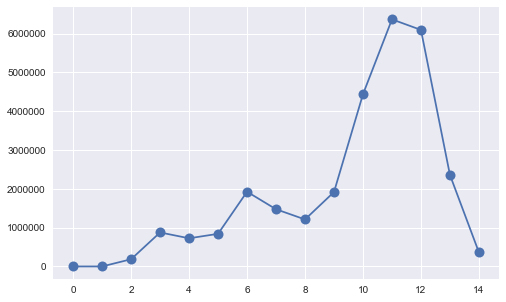

In [59]:
us_df['Month'] = pd.DatetimeIndex(us_df['submission_date']).month_name()
us_df['report_date']= pd.to_datetime(us_df['submission_date']) 
result = us_df.groupby([us_df['report_date'].dt.year, us_df['report_date'].dt.month]).agg({'new_case':sum})

plt.style.use('seaborn')
plt.figure(figsize=(8, 5))
plt.plot(result.loc[:, 'new_case'].values, marker='.', markersize='20')

[Text(0, 0, '(2020, 1)'),
 Text(0, 0, '(2020, 2)'),
 Text(0, 0, '(2020, 3)'),
 Text(0, 0, '(2020, 4)'),
 Text(0, 0, '(2020, 5)'),
 Text(0, 0, '(2020, 6)'),
 Text(0, 0, '(2020, 7)'),
 Text(0, 0, '(2020, 8)'),
 Text(0, 0, '(2020, 9)'),
 Text(0, 0, '(2020, 10)'),
 Text(0, 0, '(2020, 11)'),
 Text(0, 0, '(2020, 12)'),
 Text(0, 0, '(2021, 1)'),
 Text(0, 0, '(2021, 2)'),
 Text(0, 0, '(2021, 3)')]

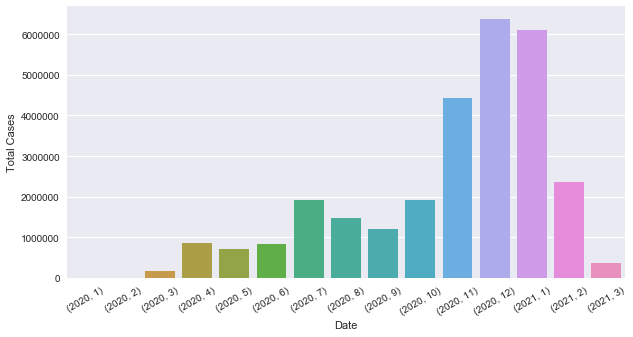

In [60]:
sns.set_palette("pastel")
plt.figure(figsize=(10,5))
plt1 = sns.barplot(x=result.index, y=result.new_case, data = result)
plt1.set(xlabel='Date', ylabel = 'Total Cases')
plt1.set_xticklabels(labels=result.index, rotation=30, horizontalalignment='center')

Chart 2: Number of cases(state wise)


In [61]:
us_df.groupby(us_df['state'])
us_df.head()


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Month,report_date
2658,9/9/20,NE,36917,NaN,NaN,440,0.0,421,NaN,NaN,15,0.0,9/10/20 14:02,Not agree,Not agree,September,2020-09-09
7917,9/9/20,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,9/10/20 14:02,Agree,Agree,September,2020-09-09
10008,9/9/20,IA,71265,NaN,NaN,400,36.0,1194,NaN,NaN,15,0.0,9/10/20 14:02,Not agree,Not agree,September,2020-09-09
4543,9/9/20,AZ,206541,204715.0,1826.0,496,20.0,5251,4978.0,273.0,30,-1.0,9/10/20 14:02,Agree,Agree,September,2020-09-09
19844,9/9/20,CA,739527,NaN,NaN,1616,0.0,13841,NaN,NaN,83,0.0,9/10/20 14:02,Not agree,Not agree,September,2020-09-09


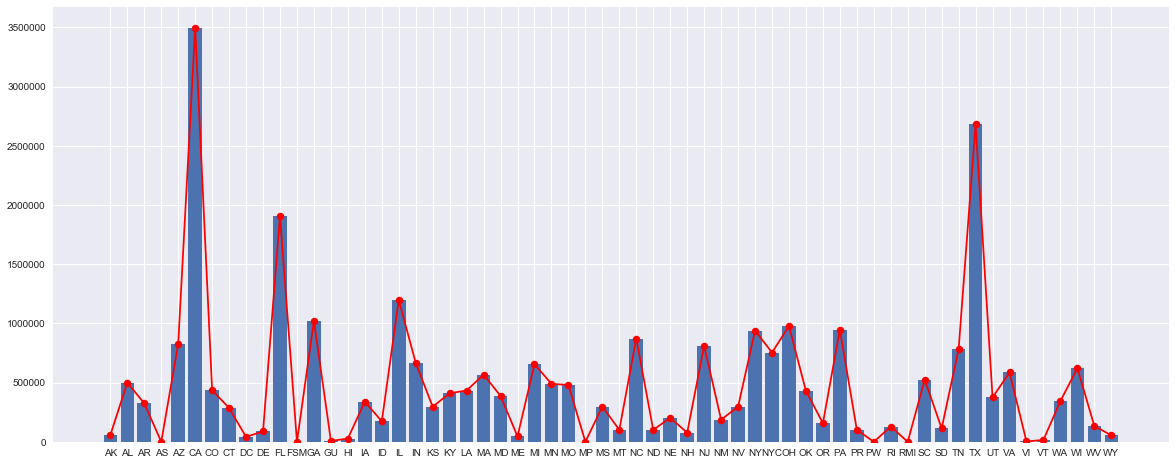

In [62]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 8))

state_result = us_df.groupby(us_df['state']).agg({'new_case':sum})
plt.bar(height=state_result['new_case'], x=state_result.index)
plt.plot(state_result.loc[:, 'new_case'].values, marker='.', markersize='15', c='r')
# state_result

Chart 3: Number of cases recovered(state wise)

In [63]:
us_cases_recovered = pd.read_csv('us_state_data.csv')
us_cases_recovered = us_cases_recovered.rename(columns={'USA': 'state', 'Total.1' : 'total_death', 
                    'New.1': 'new_death', 'Total.2': 'total_recovered', 'Total.3':'total_tests', 'Tests': 'test_1M_pop'})
us_cases_recovered = us_cases_recovered.loc[2:]
us_cases_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 2 to 52
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            51 non-null     object
 1   Total            51 non-null     object
 2   New              7 non-null      object
 3   total_death      51 non-null     object
 4   new_death        7 non-null      object
 5   total_recovered  49 non-null     object
 6   Active           49 non-null     object
 7   TotalCases       51 non-null     object
 8   Deaths           51 non-null     object
 9   total_tests      51 non-null     object
 10  test_1M_pop      51 non-null     object
 11  Population       51 non-null     object
dtypes: object(12)
memory usage: 4.9+ KB


<BarContainer object of 51 artists>

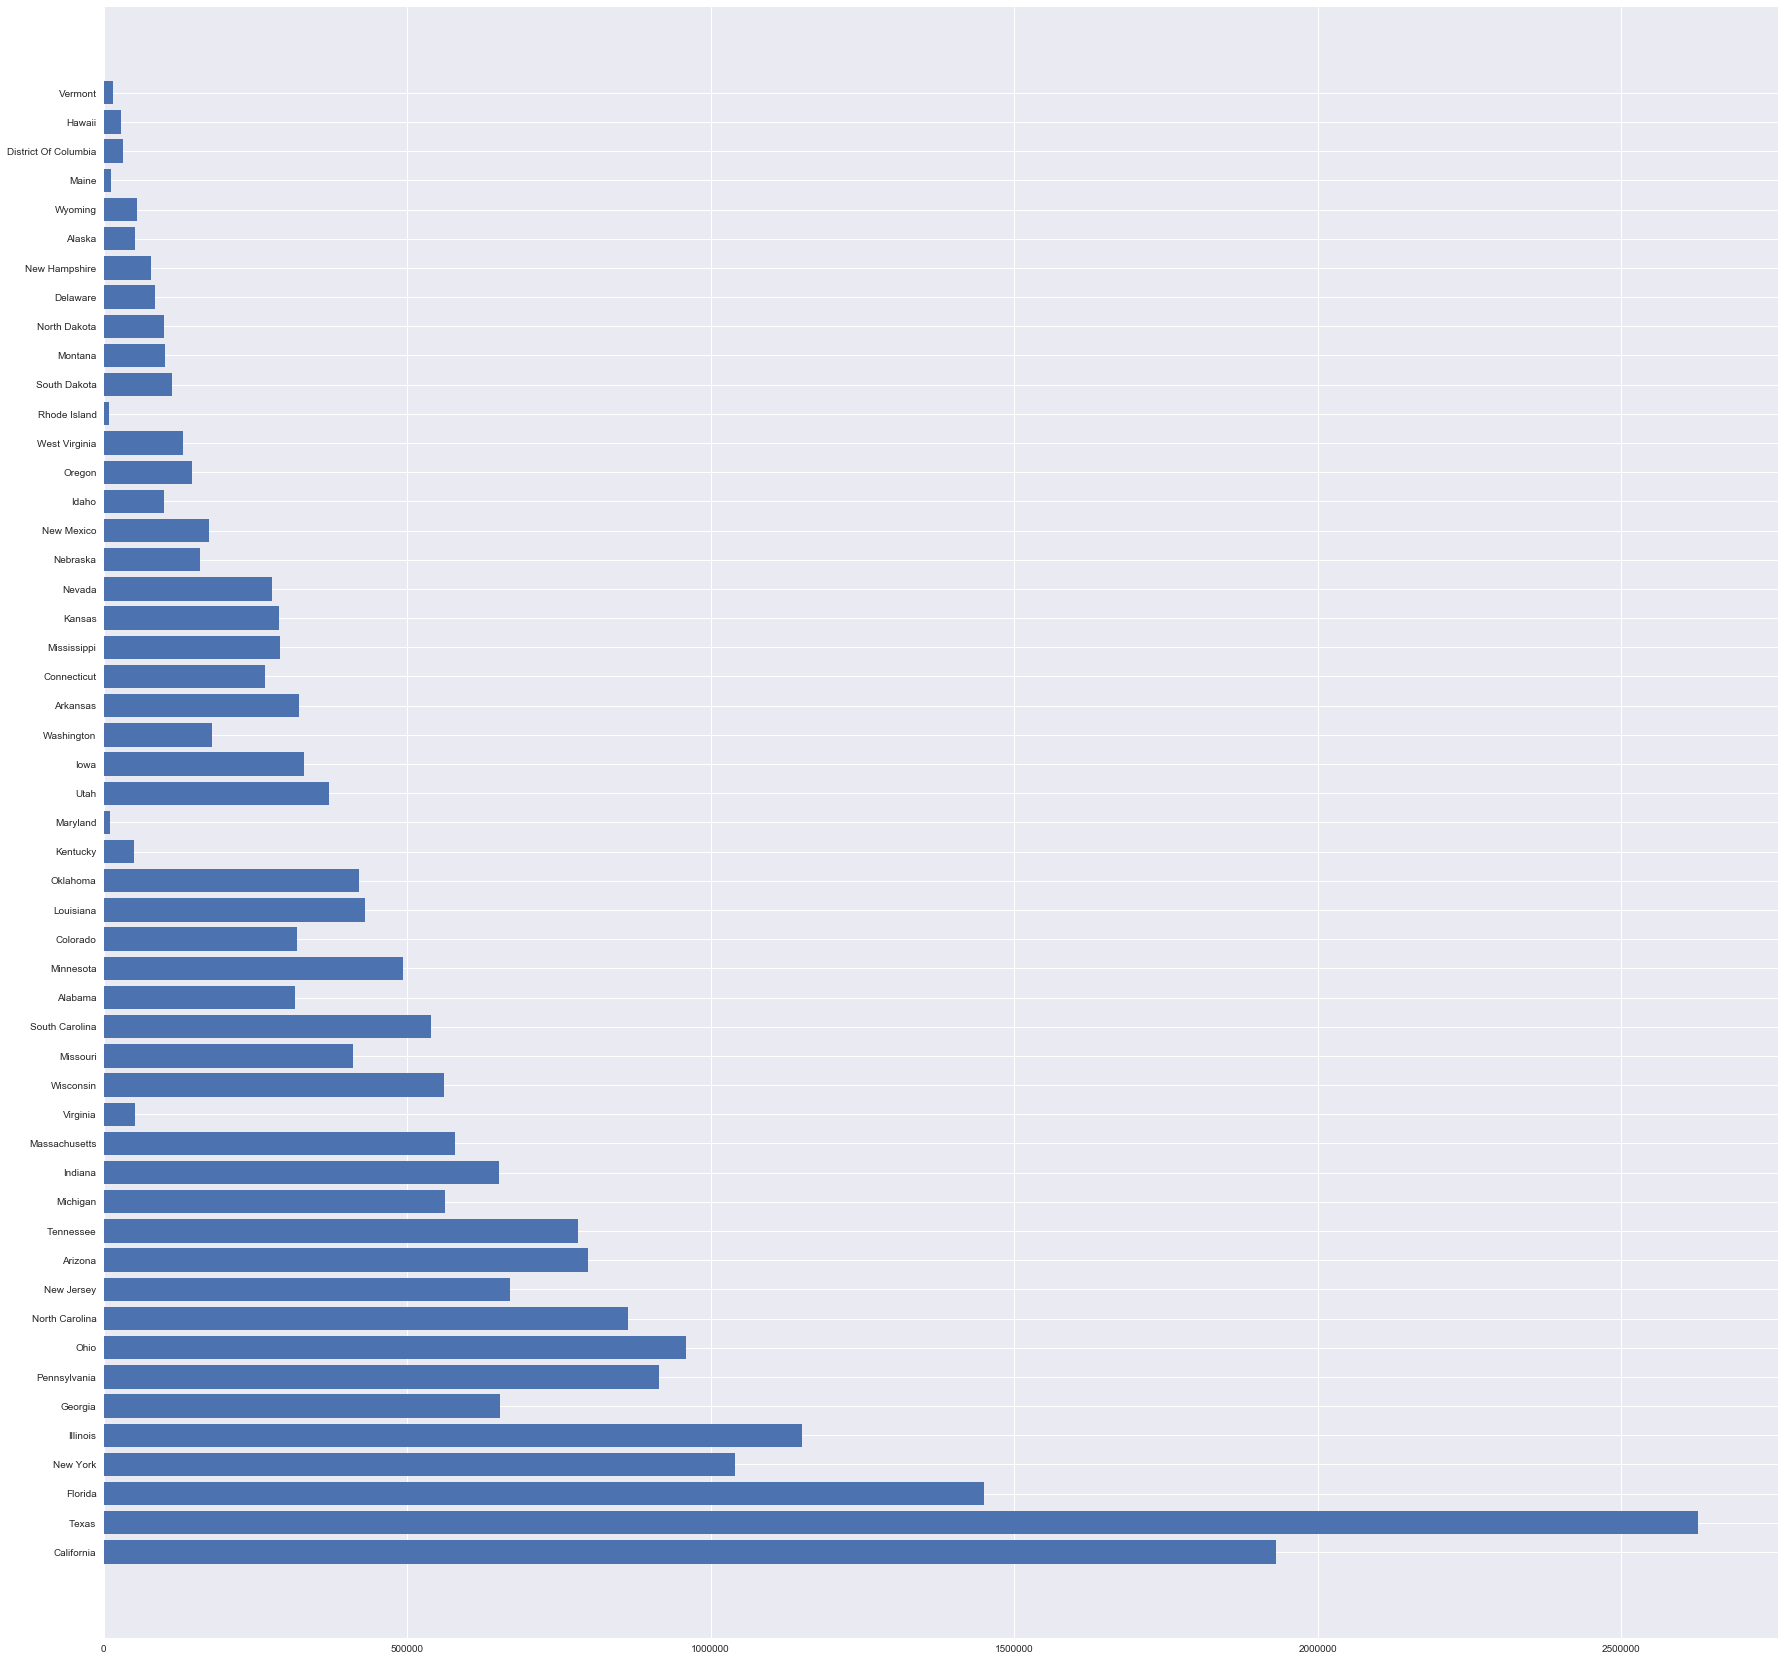

In [70]:
us_cases_recovered['Total'] = us_cases_recovered['Total'].str.replace(',', '')
us_cases_recovered['total_death'] = us_cases_recovered['total_death'].str.replace(',', '')
us_cases_recovered['total_recovered'] = us_cases_recovered.total_recovered.fillna(us_cases_recovered['Total'].astype(int) - us_cases_recovered['total_death'].astype(int))
# us_cases_recovered.info()

plt.figure(figsize=(30, 30))
if(us_cases_recovered['total_recovered'].dtype != np.number):
    us_cases_recovered['total_recovered'] = us_cases_recovered['total_recovered'].str.replace(',', '')
    us_cases_recovered["total_recovered"] = pd.to_numeric(us_cases_recovered.loc[:, "total_recovered"])

plt.barh(y=us_cases_recovered.state, width=us_cases_recovered.total_recovered)

Chart 4: Top 5 countries based on number of cases

In [65]:
df = pd.read_csv('WhoData.csv')
df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,111102016,1423.233341,2449756,31.381739,338118,2462911,31.550256,64001,0.819862,7580,NaN
1,United States of America,Americas,27773047,8390.580000,463544,140.040000,70973,493976,149.240000,13512,4.080000,2082,Community transmission
2,India,South-East Asia,11005850,797.520000,89261,6.470000,14199,156385,11.330000,653,0.050000,83,Clusters of cases
3,Brazil,Americas,10139148,4770.030000,329394,154.970000,57472,245977,115.720000,7445,3.500000,1212,Community transmission
4,Russian Federation,Europe,4177330,2862.470000,91240,62.520000,12604,83630,57.310000,3110,2.130000,337,Clusters of cases


In [66]:
df = df.rename(columns={'Cases - cumulative total': 'total_cases',
                       'Name': 'country_names'})
df = df.loc[1:]
df.head()

,country_names,WHO Region,total_cases,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
1,United States of America,Americas,27773047,8390.58,463544,140.04,70973,493976,149.24,13512,4.08,2082,Community transmission
2,India,South-East Asia,11005850,797.52,89261,6.47,14199,156385,11.33,653,0.05,83,Clusters of cases
3,Brazil,Americas,10139148,4770.03,329394,154.97,57472,245977,115.72,7445,3.50,1212,Community transmission
4,Russian Federation,Europe,4177330,2862.47,91240,62.52,12604,83630,57.31,3110,2.13,337,Clusters of cases
5,The United Kingdom,Europe,4115513,6062.39,77431,114.06,9834,120580,177.62,3414,5.03,215,Community transmission


In [67]:
cases = df.loc[:, 'total_cases'].values
countries = df.loc[:, 'country_names'].values
cases[:5]

array([27773047, 11005850, 10139148,  4177330,  4115513])

Text(0, 0.5, 'Cases')

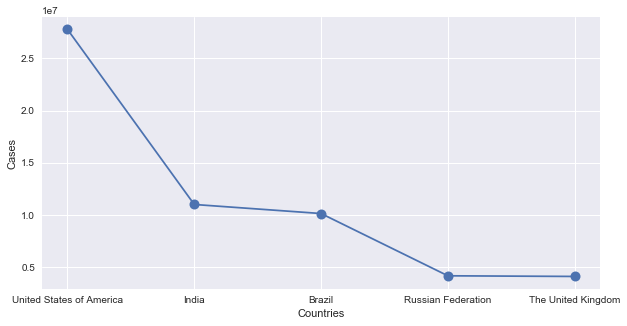

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(countries[:5], cases[:5], marker = '.', markersize = 20)
plt.xlabel('Countries')
plt.ylabel('Cases')